In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
import matplotlib.pyplot as plt

from diffusers import DiffusionPipeline, StableDiffusion3Pipeline, FluxPipeline

from drum import DrUM

#model_id = "runwayml/stable-diffusion-v1-5"
#model_id = "stabilityai/stable-diffusion-2-1"
#model_id = "stabilityai/stable-diffusion-xl-base-1.0"
#model_id = "stabilityai/stable-diffusion-3.5-large"
model_id = "black-forest-labs/FLUX.1-dev"

dtype = torch.bfloat16

if "flux" in model_id.split("/")[-1].lower():
    pipeline = FluxPipeline.from_pretrained(model_id, torch_dtype = dtype)
elif "stable-diffusion-3.5" in model_id.split("/")[-1].lower():
    pipeline = StableDiffusion3Pipeline.from_pretrained(model_id, torch_dtype = dtype)
else:
    pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype = dtype)
pipeline = pipeline.to("cuda")
#pipeline.safety_checker = lambda images, clip_input: (images, [False] * len(images))

#if you want to use manual weights, you can specify the weights directory, for example: "weight = ./weight"
#drum = DrUM(model_id, torch_dtype = dtype, device = "cuda")
drum = DrUM(pipeline)

2025-03-08 05:35:07.680864: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-08 05:35:07.680913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-08 05:35:07.680940: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 05:35:07.687714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-08 05:35:08.354783: W tensorflow/compiler/

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

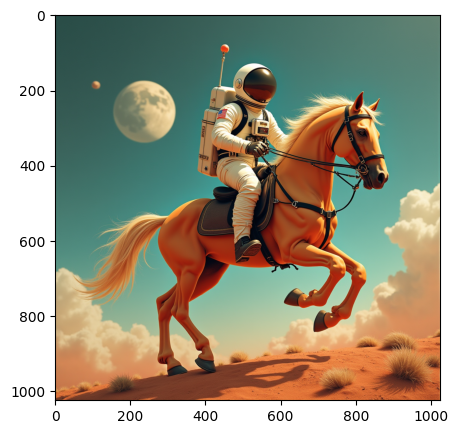

In [2]:
prompt = "a photograph of an astronaut riding a horse"
ref = ["A retro-futuristic space exploration movie poster with bold, vibrant colors"]
weight = [1]
alpha = 0.5 #scale range 0 - 1
num_images_per_prompt = 1
save_path = "./image"

image = drum(prompt, ref, weight = weight, alpha = alpha, sampling = False, skip = None, seed = 42,
             size = None, num_inference_steps = None, num_images_per_prompt = num_images_per_prompt)

fig = plt.figure(figsize = (len(image) * 5, 5))
for i, img in enumerate(image):
    fig.add_subplot(1, len(image), i + 1)
    plt.imshow(img)
    
    img.save(os.path.join(save_path, "{0:05d}.png".format(i)))
plt.show()